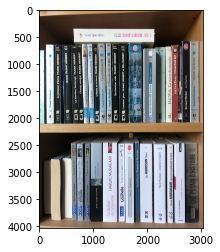

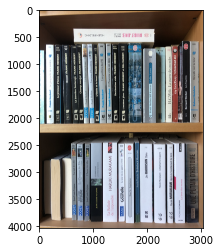

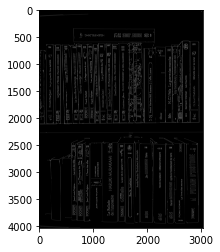

<ipython-input-1-ce587cce4b63>:41: RuntimeWarning: overflow encountered in ubyte_scalars
  lineMerge[a,i] = edges[a-2,i] + edges[a-1,i] + edges[a,i]


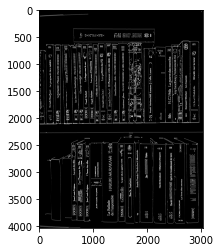

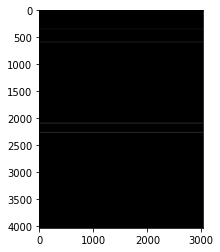

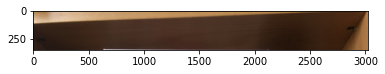

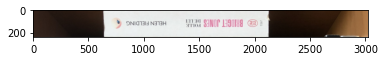

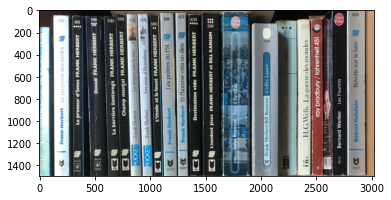

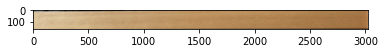

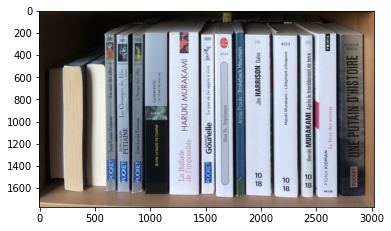

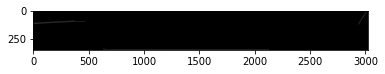

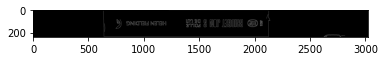

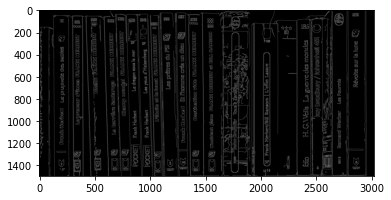

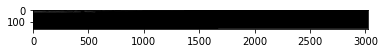

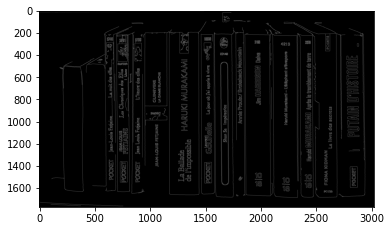

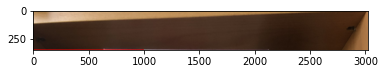

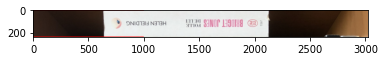

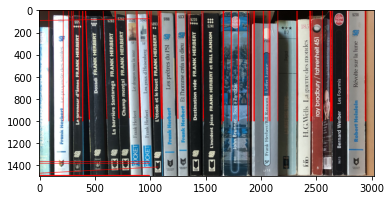

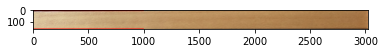

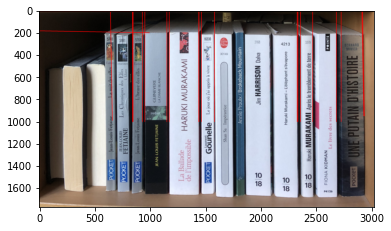

In [1]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2



### original image ###

img = Image.open('../image/img16.jpg')
width, height = img.size
img = np.array(img)
plt.imshow(img)
plt.show()



### noiseless image ###

img = cv2.GaussianBlur(img, (7, 7), 0)
plt.imshow(img)
plt.show()



### Canny filter ###

edges = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img, 50, 150)
plt.imshow(edges, cmap='gray')
plt.show()



### horizontal line merge ###

lineMerge = np.zeros_like(edges)
for a in range(2,height):
    for i in range(1,width):
        lineMerge[a,i] = edges[a-2,i] + edges[a-1,i] + edges[a,i]
plt.imshow(lineMerge, cmap='gray')
plt.show()



### horizontal line find ###

treshold = 30*width/100 # 50% of the width
lines = []
lines.append(0)

for a in range(0,height):
    cpt = 0
    for i in range(0,width):
        if lineMerge[a,i] != 0:
            cpt = cpt + 1
    
    if cpt>treshold:
        lines.append(a)
        for i in range(0,width):
            lineMerge[a,i] = 255
    else:
        for i in range(0,width):
            lineMerge[a,i] = 0

lines.append(height)

plt.imshow(lineMerge, cmap='gray')
plt.show()



### crop image ###

croppedImg = []
img = Image.fromarray(img, 'RGB')

last = None
for line in lines:
    if (last != None and last<line-10):
        croppedImg.append(img.crop((0, last, width, line)))
    last = line
    
for im in croppedImg:
    plt.imshow(im)
    plt.show()
    


### Canny filter ###

croppedEdges = []

for im in croppedImg:
    tmp = np.array(im)
    tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2GRAY)
    croppedEdges.append(cv2.Canny(tmp, 50, 150))

for imE in croppedEdges:
    plt.imshow(imE, cmap='gray')
    plt.show()
    
    

### Hough transform ###

for i in range(len(croppedImg)):
    w,h = croppedImg[i].size
    treshold = 300
    lines = cv2.HoughLines(croppedEdges[i], 1, np.pi/180, treshold)
    
    for line in lines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
        
            croppedImg[i] = np.array(croppedImg[i])
            croppedImg[i] = cv2.line(croppedImg[i], (x1,y1), (x2,y2), (255,0,0), 3)

    plt.imshow(croppedImg[i])
    plt.show()
